In [65]:
import csv
from matplotlib import pyplot as plt
import numpy as np
from math import ceil
import sys
sys.path.append('../config')
from HelperFunctions import printdict

In [67]:
results_by_col = {}
results_by_p = {}
results_by_p_physics = {}
Colours = set()
Particles = set()
with open('../data/Particolours_example.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for x,row in enumerate(reader):
        results_by_col[x] = {}
        for key in row.keys():
            if key == 'Timestamp':
                results_by_col[x]['timestamp'] = row[key]
            elif key == '(Optional) Are you a particle physicist?':
                results_by_col[x]['physYN'] = row[key]
            else:
                colour = key.split('[')[-1].split(']')[0]
                Colours.add(colour.lower())
                if "particles" in key:
                    results_by_col[x]["p_"+colour.lower()] = row[key]
                elif "quarks" in key:
                    results_by_col[x]["q_"+colour.lower()] = row[key]
        
        for key, val in results_by_col[x].items():
            if key in ['timestamp','physYN']:
                if key not in results_by_p.keys():
                    results_by_p[key] = []
                    results_by_p_physics[key] = []
                results_by_p[key].append(results_by_col[x][key])
                if results_by_col[x]['physYN'] == "Yes":
                    results_by_p_physics[key].append(results_by_col[x][key])
            elif val != '':
                if val not in results_by_p.keys():
                    Particles.add(val)
                    results_by_p[val] = []
                    results_by_p_physics[val] = []
                if results_by_col[x]['physYN'] == "Yes":
                    results_by_p_physics[val].append(key.split("_")[-1])
                results_by_p[val].append(key.split("_")[-1])
                
    for key, val in results_by_p_physics.items():
        print(key,':',val)
        print(len(val))

timestamp : ['2022/12/03 12:48:06 pm GMT', '2022/12/09 4:24:21 pm GMT', '2022/12/09 4:34:16 pm GMT', '2022/12/09 4:38:14 pm GMT', '2022/12/09 4:38:15 pm GMT', '2022/12/09 4:40:37 pm GMT', '2022/12/09 5:19:28 pm GMT', '2022/12/09 6:01:21 pm GMT', '2022/12/09 6:04:16 pm GMT', '2022/12/09 6:24:10 pm GMT', '2022/12/10 11:55:54 am GMT', '2022/12/10 2:09:15 pm GMT']
12
Muon : ['red', 'brown', 'red', 'orange', 'brown', 'purple', 'orange', 'orange', 'blue', 'purple', 'orange', 'purple']
12
Electron : ['green', 'yellow', 'green', 'yellow', 'yellow', 'orange', 'yellow', 'green', 'red', 'blue', 'red', 'yellow']
12
Proton : ['blue', 'red', 'blue', 'red', 'blue', 'red', 'red', 'red', 'purple', 'gold', 'blue', 'red']
12
Z boson : ['orange', 'orange', 'black', 'silver', 'orange', 'white', 'purple', 'white', 'gold', 'white', 'purple']
11
Higgs boson : ['purple', 'magenta', 'yellow', 'grey', 'silver', 'pink', 'white', 'magenta', 'beige', 'black', 'gold']
11
Tau lepton : ['brown', 'beige', 'cyan', 'gold

In [68]:
#print(results_by_col[0])
print(list(Colours))
print(list(Particles))

['cyan', 'magenta', 'white', 'beige', 'grey', 'purple', 'colourless', 'silver', 'yellow', 'brown', 'red', 'gold', 'pink', 'orange', 'black', 'green', 'blue']
['Neutron', 'Z boson', 'Tau lepton', 'W boson(s)', 'Strange quark', 'Charm quark', 'Higgs boson', 'Muon', 'Electron', 'Bottom quark', 'Proton', 'Down quark', 'Top quark', 'Up quark']


## First plot a colour pie chart for each particle

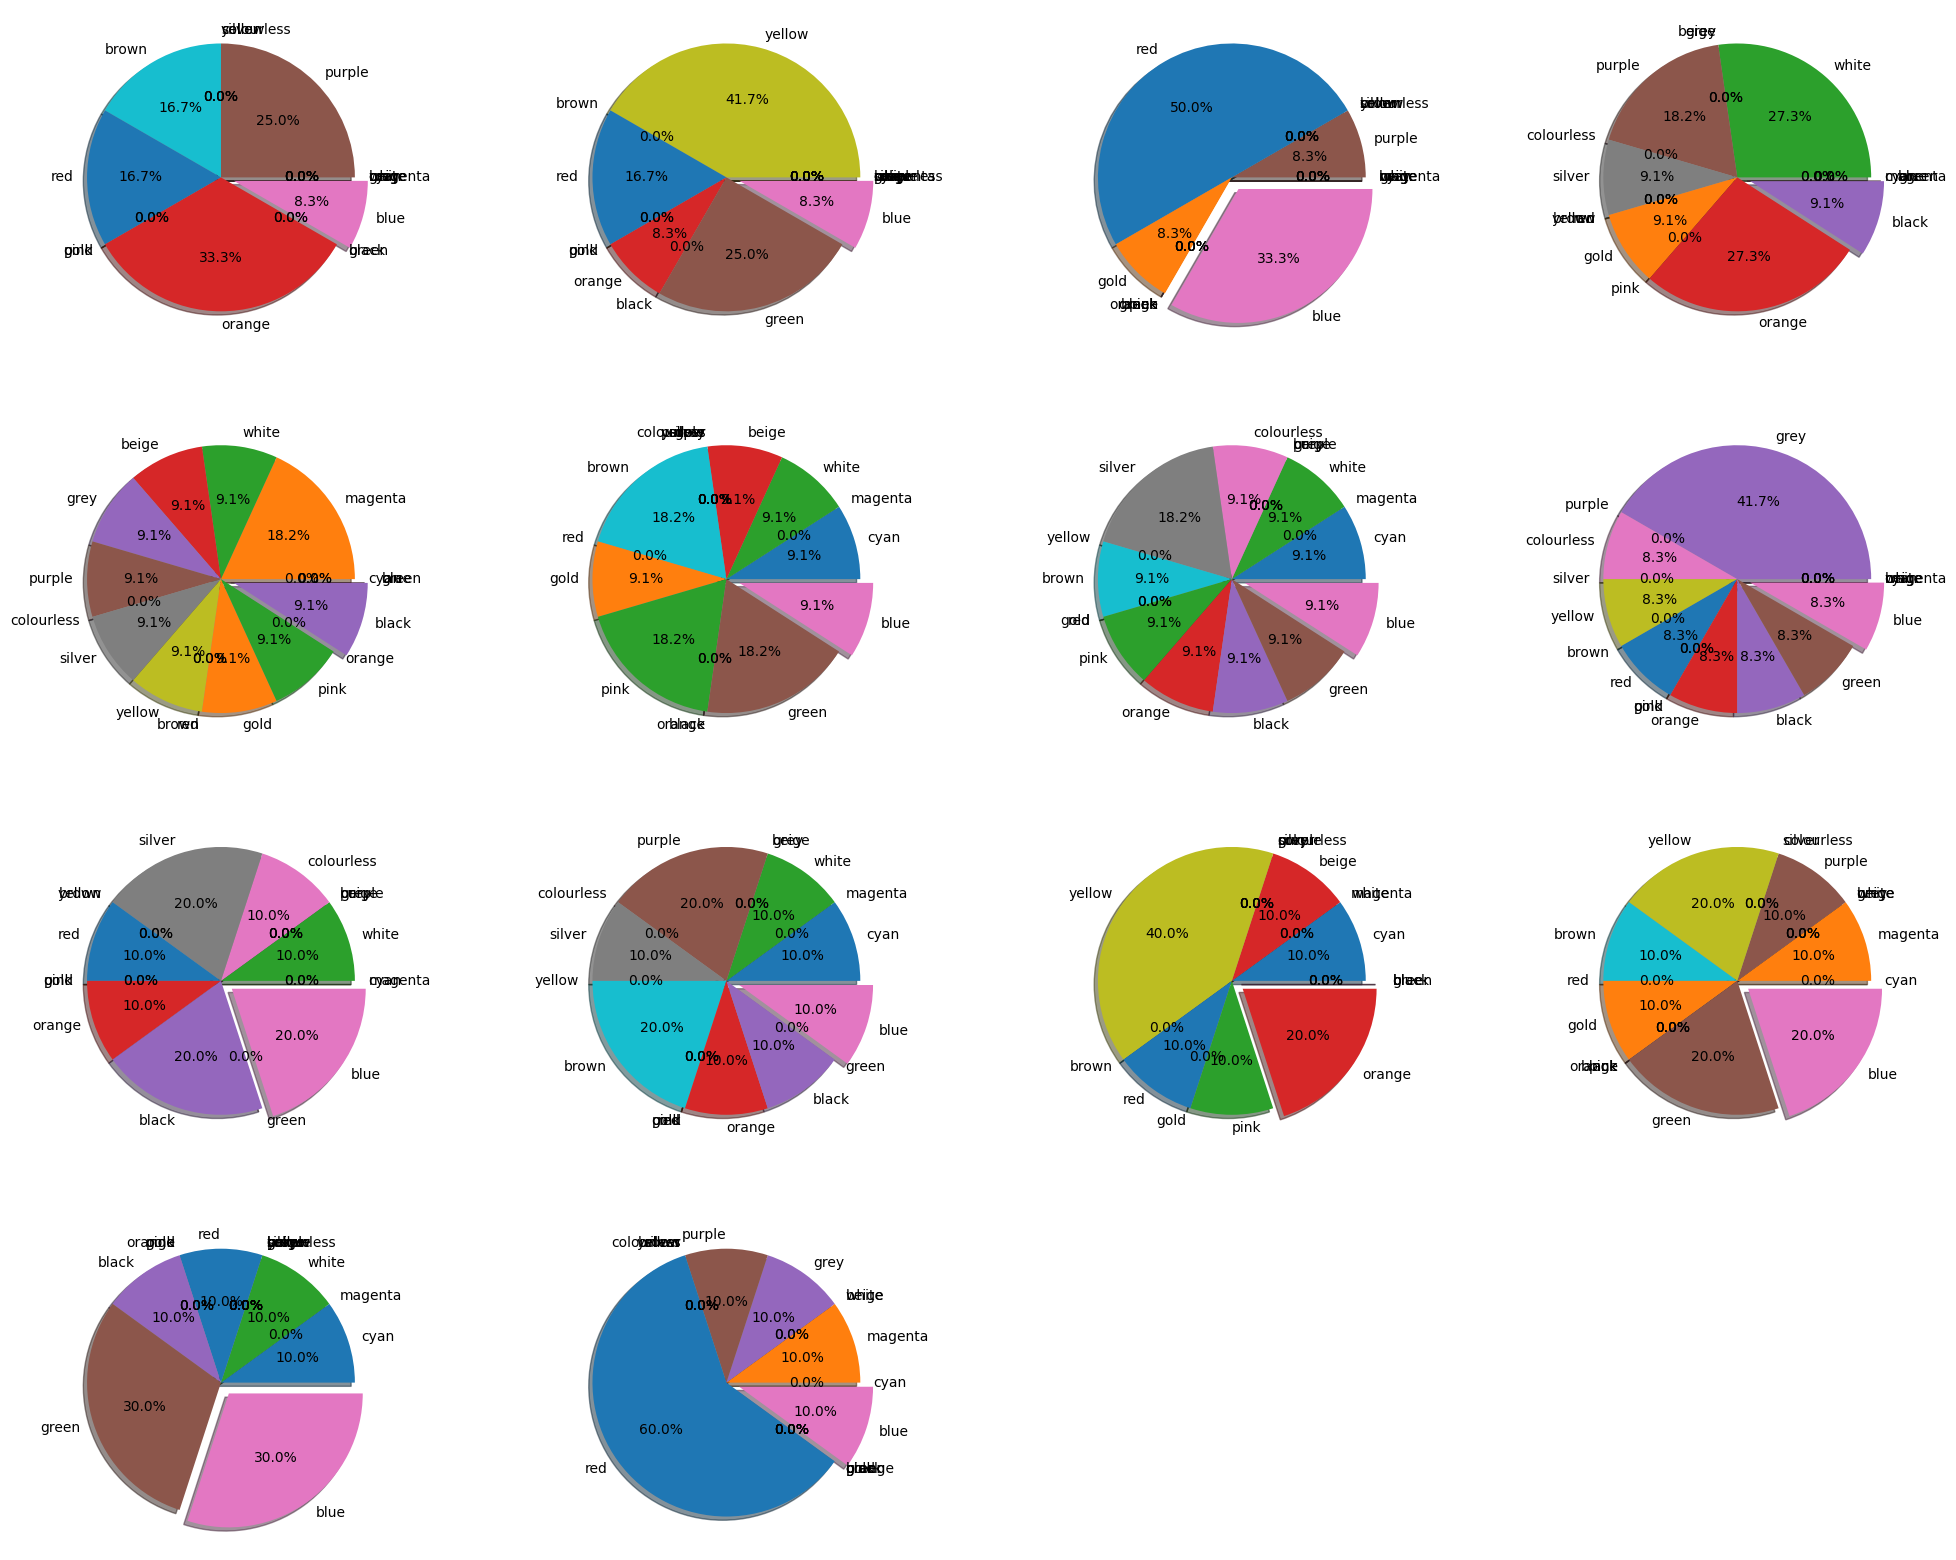

In [81]:
labels = list(Colours)
Ncols = len(labels)
Nparticles = len(Particles)
Ncolumns = 4
Nrows = ceil(Nparticles/Ncolumns)
pos_index = range(1,Nparticles + 1)
fig = plt.figure(1,(25,20))
#fig, axs = plt.subplot(ceil(ncols/4),4)
index=0
for particle,cols in results_by_p_physics.items():
    if particle in ['timestamp','physYN']:
        continue
    max_cols = []
    max_val = 0
    sizes = np.zeros(ncols)
    for x,col in enumerate(labels):
        tmp_num = sum(c == col for c in cols)
        if tmp_num == max_val:
            max_cols.append(x)
        elif tmp_num > max_val:
            max_cols = [x]
        sizes[x] = tmp_num
    explode = np.zeros(ncols)
    for ID in max_cols:
        explode[ID] = 0.1
    ax = fig.add_subplot(Nrows,Ncolumns,pos_index[index])
    ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=0)
    #ax.axis('equal')
    #ax.plot()
    index=index+1
    
plt.show()
# explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

# fig1, ax1 = plt.subplots()
# ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
#         shadow=True, startangle=90)
# ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# plt.show()